In [378]:
import pandas as pd

In [379]:
# считаем описание данных
df = pd.read_csv('02_otp_desc.csv', sep=';').loc[:,'ПОЛЕ':'ОПИСАНИЕ']

In [319]:
#df

In [320]:
# считаем все-все данные

In [380]:
train = pd.read_csv('02_otp_train.csv', sep=';')

In [381]:
train.shape

(15223, 52)

In [382]:
test = pd.read_csv('02_otp_test.csv', sep=';')

In [383]:
test.shape

(14910, 51)

In [325]:
# отделим таргет от TRAIN-а

In [384]:
y = train['TARGET']

In [385]:
train = train.drop('TARGET', axis=1)

In [328]:
# соеденим train и test

In [386]:
all_data = pd.concat([train, test])

In [387]:
# необходимо удалить индекс, 
# у нас есть 0-строка в train и 0-строка в test (и так далее 1,2,3,4)
# если мы просто объеденим - у нас сохранятся индексы
# мы же просто уберем индекс и автоматически создастся новый индекс, сквозной и уникальный
all_data = all_data.reset_index(drop=True)

In [331]:
# посмотрим типы данных и их заполняемость

In [388]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_P

In [333]:
# Видим, что часть данных - object, скорее всего строки.
# Давайте выведем эти значения для каждого столбца

In [389]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
       # print(i) # выводим название столбца
        print(set(all_data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        #print() # выводим пустую строку

{'Среднее', 'Среднее специальное', 'Два и более высших образования', 'Неоконченное высшее', 'Неполное среднее', 'Высшее', 'Ученая степень'}
{'Гражданский брак', 'Разведен(а)', 'Не состоял в браке', 'Состою в браке', 'Вдовец/Вдова'}
{nan, 'Наука', 'Строительство', 'Транспорт', 'ЧОП/Детективная д-ть', 'Другие сферы', 'Информационные технологии', 'Логистика', 'Государственная служба', 'СМИ/Реклама/PR-агенства', 'Коммунальное хоз-во/Дорожные службы', 'Подбор персонала', 'Салоны красоты и здоровья', 'Недвижимость', 'Энергетика', 'Образование', 'Маркетинг', 'Информационные услуги', 'Страхование', 'Химия/Парфюмерия/Фармацевтика', 'Сборочные производства', 'Сельское хозяйство', 'Банк/Финансы', 'Туризм', 'Нефтегазовая промышленность', 'Торговля', 'Развлечения/Искусство', 'Здравоохранение', 'Ресторанный бизнес/Общественное питание', 'Управляющая компания', 'Юридические услуги/нотариальные услуги', 'Металлургия/Промышленность/Машиностроение'}
{nan, 'Другое', 'Индивидуальный предприниматель', 'Раб

In [335]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [390]:
all_data['PERSONAL_INCOME'] = all_data['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [337]:
# причина же что использовалась запятая для разделения не целой части числа

In [391]:
all_data['CREDIT'] = all_data['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['FST_PAYMENT'] = all_data['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_AVG_DLQ_AMT'] = all_data['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_MAX_DLQ_AMT'] = all_data['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [339]:
# запускаем повторно код и смотрим, какие столбцы с какими строковыми значениями остались

In [393]:
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object':
        print(i)
        print(set(all_data[i]))
        print()

EDUCATION
{'Среднее', 'Среднее специальное', 'Два и более высших образования', 'Неоконченное высшее', 'Неполное среднее', 'Высшее', 'Ученая степень'}

MARITAL_STATUS
{'Гражданский брак', 'Разведен(а)', 'Не состоял в браке', 'Состою в браке', 'Вдовец/Вдова'}

GEN_INDUSTRY
{nan, 'Наука', 'Строительство', 'Транспорт', 'ЧОП/Детективная д-ть', 'Другие сферы', 'Информационные технологии', 'Логистика', 'Государственная служба', 'СМИ/Реклама/PR-агенства', 'Коммунальное хоз-во/Дорожные службы', 'Подбор персонала', 'Салоны красоты и здоровья', 'Недвижимость', 'Энергетика', 'Образование', 'Маркетинг', 'Информационные услуги', 'Страхование', 'Химия/Парфюмерия/Фармацевтика', 'Сборочные производства', 'Сельское хозяйство', 'Банк/Финансы', 'Туризм', 'Нефтегазовая промышленность', 'Торговля', 'Развлечения/Искусство', 'Здравоохранение', 'Ресторанный бизнес/Общественное питание', 'Управляющая компания', 'Юридические услуги/нотариальные услуги', 'Металлургия/Промышленность/Машиностроение'}

GEN_TITLE
{na

# Данные готовы, теперь вам предлагается начать решать задачу

In [394]:
# Есть ли пропуски в данных? что с ними сделать?

# Ваш код :-)

all_data.WORK_TIME[all_data.WORK_TIME.isnull()] = all_data.WORK_TIME.mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [395]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        print(i)

EDUCATION
MARITAL_STATUS
GEN_INDUSTRY
GEN_TITLE
ORG_TP_STATE
ORG_TP_FCAPITAL
JOB_DIR
FAMILY_INCOME
REG_ADDRESS_PROVINCE
FACT_ADDRESS_PROVINCE
POSTAL_ADDRESS_PROVINCE
TP_PROVINCE
REGION_NM


In [396]:
# Как поступить со строковыми переменными?

# Ваш код :-)
all_data = all_data.drop(['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM','PREVIOUS_CARD_NUM_UTILIZED'], axis=1)

In [397]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 37 columns):
AGREEMENT_RK           30133 non-null int64
AGE                    30133 non-null int64
SOCSTATUS_WORK_FL      30133 non-null int64
SOCSTATUS_PENS_FL      30133 non-null int64
GENDER                 30133 non-null int64
CHILD_TOTAL            30133 non-null int64
DEPENDANTS             30133 non-null int64
PERSONAL_INCOME        30133 non-null float64
REG_FACT_FL            30133 non-null int64
FACT_POST_FL           30133 non-null int64
REG_POST_FL            30133 non-null int64
REG_FACT_POST_FL       30133 non-null int64
REG_FACT_POST_TP_FL    30133 non-null int64
FL_PRESENCE_FL         30133 non-null int64
OWN_AUTO               30133 non-null int64
AUTO_RUS_FL            30133 non-null int64
HS_PRESENCE_FL         30133 non-null int64
COT_PRESENCE_FL        30133 non-null int64
GAR_PRESENCE_FL        30133 non-null int64
LAND_PRESENCE_FL       30133 non-null int64
CREDIT   

In [345]:
# В итоге должны получиться данные без пропусков и только числовые

In [398]:
# Вновь разделите на train и test (не мешая)

# Ваш код :-)
train1 = train['AGREEMENT_RK'].tolist()
train_new = all_data[all_data['AGREEMENT_RK'].isin(train1)]
#train_new

In [399]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 0 to 15222
Data columns (total 37 columns):
AGREEMENT_RK           15223 non-null int64
AGE                    15223 non-null int64
SOCSTATUS_WORK_FL      15223 non-null int64
SOCSTATUS_PENS_FL      15223 non-null int64
GENDER                 15223 non-null int64
CHILD_TOTAL            15223 non-null int64
DEPENDANTS             15223 non-null int64
PERSONAL_INCOME        15223 non-null float64
REG_FACT_FL            15223 non-null int64
FACT_POST_FL           15223 non-null int64
REG_POST_FL            15223 non-null int64
REG_FACT_POST_FL       15223 non-null int64
REG_FACT_POST_TP_FL    15223 non-null int64
FL_PRESENCE_FL         15223 non-null int64
OWN_AUTO               15223 non-null int64
AUTO_RUS_FL            15223 non-null int64
HS_PRESENCE_FL         15223 non-null int64
COT_PRESENCE_FL        15223 non-null int64
GAR_PRESENCE_FL        15223 non-null int64
LAND_PRESENCE_FL       15223 non-null int64
CREDIT   

In [400]:
test1 = test['AGREEMENT_RK'].tolist()
test_new = all_data[all_data['AGREEMENT_RK'].isin(test1)]
#test_new

In [401]:
test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14910 entries, 15223 to 30132
Data columns (total 37 columns):
AGREEMENT_RK           14910 non-null int64
AGE                    14910 non-null int64
SOCSTATUS_WORK_FL      14910 non-null int64
SOCSTATUS_PENS_FL      14910 non-null int64
GENDER                 14910 non-null int64
CHILD_TOTAL            14910 non-null int64
DEPENDANTS             14910 non-null int64
PERSONAL_INCOME        14910 non-null float64
REG_FACT_FL            14910 non-null int64
FACT_POST_FL           14910 non-null int64
REG_POST_FL            14910 non-null int64
REG_FACT_POST_FL       14910 non-null int64
REG_FACT_POST_TP_FL    14910 non-null int64
FL_PRESENCE_FL         14910 non-null int64
OWN_AUTO               14910 non-null int64
AUTO_RUS_FL            14910 non-null int64
HS_PRESENCE_FL         14910 non-null int64
COT_PRESENCE_FL        14910 non-null int64
GAR_PRESENCE_FL        14910 non-null int64
LAND_PRESENCE_FL       14910 non-null int64
CREDI

In [402]:
# Сделать hold-out sampling на train выборке
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_new, y, test_size=0.3, random_state=42)
# test_size=0.3, random_state=42

# Ваш код :-)


In [351]:
## РЕВЕРТ ДЛЯ ПРЕДИТКА ##
def revert_predict(arr):
    from numpy import empty, int64, append, array as _array
    return append(empty(0, dtype=int64),[revers for revers in [1 if i == 0 else 0 for i in arr]])

In [352]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Ваш код :-)

In [403]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)


In [404]:
# Посчитать метрики стандартные
# accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

precision1 = precision_score(y_test, predict)
recall1 = recall_score(y_test, predict)
accuracy1 = accuracy_score(y_test, predict)
# Ваш код :-)


In [405]:
print (precision1)
print (recall1)
print (accuracy1)

0.152276295133
0.174774774775
0.781475804686


(-0.01, 1.01)

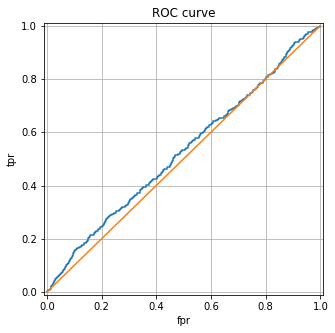

In [418]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [407]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predict = dtc.predict_proba(X_test)
predict

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [409]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)

precision2 = precision_score(y_test, predict)
recall2 = recall_score(y_test, predict)
accuracy2 = accuracy_score(y_test, predict)



In [410]:
print (precision2)
print (recall2)
print (accuracy2)

0.178571428571
0.00900900900901
0.874534705496


(-0.01, 1.01)

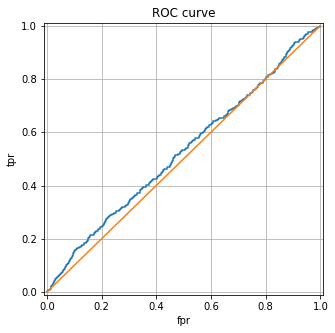

In [419]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [412]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predict = rfc.predict_proba(X_test)
predict

array([[ 1. ,  0. ],
       [ 0.6,  0.4],
       [ 0.7,  0.3],
       ..., 
       [ 0.9,  0.1],
       [ 0.9,  0.1],
       [ 0.9,  0.1]])

In [413]:


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)

precision3 = precision_score(y_test, predict)
recall3 = recall_score(y_test, predict)
accuracy3 = accuracy_score(y_test, predict)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [414]:
print (precision3)
print (recall3)
print (accuracy3)

0.0
0.0
0.878476023648


(-0.01, 1.01)

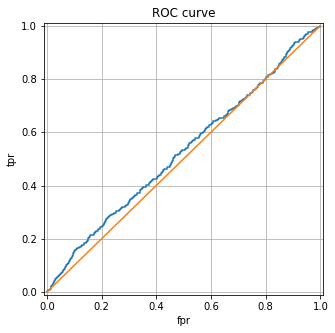

In [420]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [416]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict = lr.predict_proba(X_test)
predict

array([[ 0.84946403,  0.15053597],
       [ 0.85377973,  0.14622027],
       [ 0.86408377,  0.13591623],
       ..., 
       [ 0.86309792,  0.13690208],
       [ 0.86599334,  0.13400666],
       [ 0.8860268 ,  0.1139732 ]])

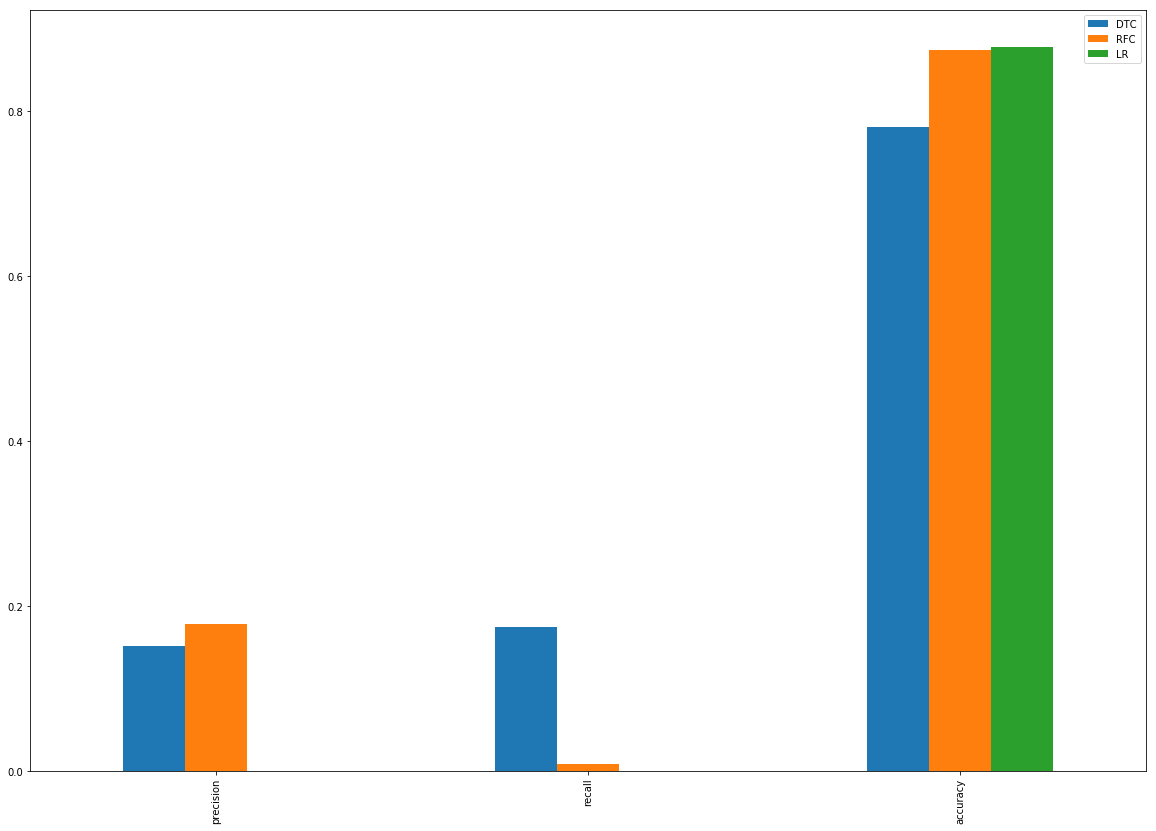

In [417]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
from matplotlib import pyplot as pl
%matplotlib inline

fig, ax = pl.subplots(figsize=(20,14))

fd = pd.DataFrame([[precision1, precision2, precision3],[recall1, recall2, recall3], [accuracy1, accuracy2, accuracy3]],
                 index=['precision', 'recall', 'accuracy'], columns=pd.Index(['DTC','RFC','LR'])).plot(kind='bar', ax=ax)

# Ваш код :-)

In [ ]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

# Ваш код :-)

In [421]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
dtc = DecisionTreeClassifier()
cross_val_score(
    dtc,
    train_new,
    y,
    scoring='roc_auc',
    cv=10
)
# Ваш код :-)

array([ 0.51423576,  0.50566864,  0.55345026,  0.528232  ,  0.53260328,
        0.53421418,  0.52065746,  0.51008153,  0.54063719,  0.57237116])

In [37]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

# Ваш код :-)